## 라이브러리

In [2]:
import pandas as pd
import numpy as np
import plotly as py
import seaborn as sns
from konlpy.tag import Okt # Okt는 명사 형태소 추출 단위
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import re
# import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings('ignore')

## 데이터 읽기

In [3]:
df = pd.read_csv('분야별/국내소설.csv')
df

,part,title,date,rating,text
0,국내소설,하얼빈,2022-08-05,4,오랜만에 작가님의 책을 들고 우라지에서 하얼빈으로 다녀왔네요. 광복절도 다가오고 있...
1,국내소설,하얼빈,2022-08-15,4,문재인 대통령님 추천 도서라 읽고 있습니다. 아직 완독은 못 했지만 재밌습니다. 역...
2,국내소설,하얼빈,2022-08-05,4,김훈의 신작 기대가 큽니다.
3,국내소설,하얼빈,2022-08-09,4,칼의 노래를 통해 눈물빼게 하더니 총의 노래(하얼빈)을 통해 기어이 콧물까지 빠지도...
4,국내소설,하얼빈,2022-08-10,4,뉴스보고 너무 궁금해서 구입했습니다 읽기전부터 설레네요
...,...,...,...,...,...
3493,국내소설,칼의 노래,2017-03-30,3,전쟁의 소용돌이 속에 있는 장수의 心
3494,국내소설,칼의 노래,2017-03-20,4,재밌게읽었어요
3495,국내소설,칼의 노래,2017-03-06,4,이순신 장군님의 내면에 대해 더 집중된 소설..마치 그 시간대를 엿보고 온 것처럼 ...
3496,국내소설,칼의 노래,2017-02-13,4,읽으면서 그 당시 이순신 장군님에 몰입되어 느낄 수 있는 책입니다.


## 별점 히스토그램

<AxesSubplot: >

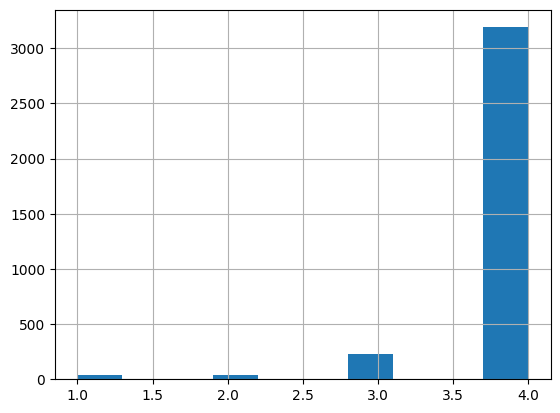

In [4]:
df['rating'].hist()

### 1 ~ 3점은 부정리뷰, 4점은 긍정리뷰

In [5]:
def rating_to_label(rating):
  if rating > 3:
    return 1
  else:
    return 0
    
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))

In [6]:
df.head()

,part,title,date,rating,text,y
0,국내소설,하얼빈,2022-08-05,4,오랜만에 작가님의 책을 들고 우라지에서 하얼빈으로 다녀왔네요. 광복절도 다가오고 있...,1
1,국내소설,하얼빈,2022-08-15,4,문재인 대통령님 추천 도서라 읽고 있습니다. 아직 완독은 못 했지만 재밌습니다. 역...,1
2,국내소설,하얼빈,2022-08-05,4,김훈의 신작 기대가 큽니다.,1
3,국내소설,하얼빈,2022-08-09,4,칼의 노래를 통해 눈물빼게 하더니 총의 노래(하얼빈)을 통해 기어이 콧물까지 빠지도...,1
4,국내소설,하얼빈,2022-08-10,4,뉴스보고 너무 궁금해서 구입했습니다 읽기전부터 설레네요,1


### 긍정은 1, 부정은 0

In [7]:
df["y"].value_counts()

1    3189
0     309
Name: y, dtype: int64

In [12]:
corpus = "".join(df['text'].tolist())
# corpus

## 정규화

In [9]:
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub('', text)
    return result

In [10]:
# apply_regular_expression(corpus) # 길이가 길어서 주석 처리 함

### 토큰화

In [13]:
okt = Okt()
nouns_ha = okt.nouns(apply_regular_expression(corpus))
# print(nouns_ha) # 길이가 길어서 주석 처리 함

In [14]:
raw_pos_tagged = okt.pos(apply_regular_expression(corpus), norm=True, stem=True)
# raw_pos_tagged # 길이가 길어서 주석 처리 함

In [15]:
# 무의미한 단어 리스트
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다']
# 한 분야의 공용 불용어 사전
# append하여 커스텀 가능 - 기자 이름 추가
# del_list.append(['소설','그냥']) # 필요하다면 개인 책에 대한 불용어 사전

word_cleaned = []
for word in raw_pos_tagged: # ('서울', 'Noun'),
  if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign", "Number"]: 
    if (len(word[0]) != 1) & (word[0] not in del_list):
      word_cleaned.append(word[0])

In [16]:
counter = Counter(word_cleaned)
counter.most_common(10)

[('읽다', 2039),
 ('좋다', 945),
 ('자다', 607),
 ('보다', 493),
 ('작가', 479),
 ('재밌다', 472),
 ('너무', 465),
 ('재미있다', 401),
 ('같다', 380),
 ('읽히다', 370)]

### 한글자 제거

In [17]:
available_counter_ha = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter_ha.most_common(10)

[('읽다', 2039),
 ('좋다', 945),
 ('자다', 607),
 ('보다', 493),
 ('작가', 479),
 ('재밌다', 472),
 ('너무', 465),
 ('재미있다', 401),
 ('같다', 380),
 ('읽히다', 370)]

In [18]:
cand_mask = np.array(Image.open('circle.png'))

In [19]:
plt.rc('font', family='NanumGothicOTF') # For MacOS, Server컴 
print(plt.rcParams['font.family'])

['NanumGothicOTF']


[윈도우 font_path 하는 방법](https://doitgrow.com/34)

In [20]:
wordcloud = WordCloud(
    font_path = 'AppleGothic', # 맥
    # font_path = 'AppleGothic', # 맥
    background_color='white', # 배경색은 흰색으로 
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(available_counter_ha)

(-0.5, 224.5, 224.5, -0.5)

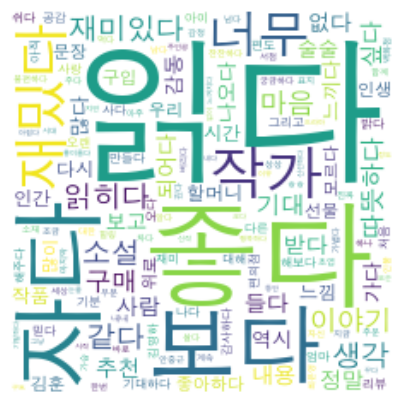

In [21]:
#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게